In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

In [2]:
URL='https://developers.google.com/public-data/docs/canonical/countries_csv'

In [3]:
response = requests.get(URL)

In [4]:
response.status_code

200

In [5]:
# display the first 300 characters in the string
print(response.text[:300])

<!doctype html>
<html 
      lang="en"
      dir="ltr">
  <head>
    
    
    
    
    <meta name="google-signin-client-id" content="721724668570-nbkv1cfusk7kk4eni4pjvepaus73b13t.apps.googleusercontent.com">
    <meta name="google-signin-scope"
          content="profile email">
    <meta property


In [6]:
# parse the string as HTML
raw_HTML = BeautifulSoup(response.text, 'html.parser')

In [7]:
raw_HTML.title

<title>countries.csv  |  Dataset Publishing Language  |  Google Developers</title>

In [8]:
# search for the <table> tag on the page
raw_HTML.find('table')

<table>
<tr>
<th scope="col">country</th>
<th scope="col">latitude</th>
<th scope="col">longitude</th>
<th scope="col">name</th>
</tr>
<tr>
<td>AD</td>
<td>42.546245</td>
<td>1.601554</td>
<td>Andorra</td>
</tr>
<tr>
<td>AE</td>
<td>23.424076</td>
<td>53.847818</td>
<td>United Arab Emirates</td>
</tr>
<tr>
<td>AF</td>
<td>33.93911</td>
<td>67.709953</td>
<td>Afghanistan</td>
</tr>
<tr>
<td>AG</td>
<td>17.060816</td>
<td>-61.796428</td>
<td>Antigua and Barbuda</td>
</tr>
<tr>
<td>AI</td>
<td>18.220554</td>
<td>-63.068615</td>
<td>Anguilla</td>
</tr>
<tr>
<td>AL</td>
<td>41.153332</td>
<td>20.168331</td>
<td>Albania</td>
</tr>
<tr>
<td>AM</td>
<td>40.069099</td>
<td>45.038189</td>
<td>Armenia</td>
</tr>
<tr>
<td>AN</td>
<td>12.226079</td>
<td>-69.060087</td>
<td>Netherlands Antilles</td>
</tr>
<tr>
<td>AO</td>
<td>-11.202692</td>
<td>17.873887</td>
<td>Angola</td>
</tr>
<tr>
<td>AQ</td>
<td>-75.250973</td>
<td>-0.071389</td>
<td>Antarctica</td>
</tr>
<tr>
<td>AR</td>
<td>-38.416097</td>


In [9]:
# can also search the same table using its class type
raw_HTML.find('table', class_= 'wikitable sortable')

In [11]:
# save table to variable
table = raw_HTML.find('table')

In [12]:
# find_all creates a list of all <tr> tags in table
# display the first 2 <tr> tags and their contents
table.find_all('tr')[:2]

[<tr>
 <th scope="col">country</th>
 <th scope="col">latitude</th>
 <th scope="col">longitude</th>
 <th scope="col">name</th>
 </tr>, <tr>
 <td>AD</td>
 <td>42.546245</td>
 <td>1.601554</td>
 <td>Andorra</td>
 </tr>]

In [13]:
# store the contents of the table that we will collect data from
# tabledata is a list
tabledata = table.find_all('tr')[1:]

In [14]:
# display first 2 <tr> tags and their contents
tabledata[:2]

[<tr>
 <td>AD</td>
 <td>42.546245</td>
 <td>1.601554</td>
 <td>Andorra</td>
 </tr>, <tr>
 <td>AE</td>
 <td>23.424076</td>
 <td>53.847818</td>
 <td>United Arab Emirates</td>
 </tr>]

In [15]:
tabledata[0]

<tr>
<td>AD</td>
<td>42.546245</td>
<td>1.601554</td>
<td>Andorra</td>
</tr>

In [16]:
# first <td> in the first table data row
tabledata[0].find_all('td')

[<td>AD</td>, <td>42.546245</td>, <td>1.601554</td>, <td>Andorra</td>]

In [17]:
# save the list of the first row's <td> tags
first_row = tabledata[0].find_all('td')

In [18]:
first_row[0]

<td>AD</td>

In [20]:
first_row[0].text

'AD'

In [21]:
# loop through each <td> tag
# print out each tag's text data
for data in first_row:
    print(data.text)

AD
42.546245
1.601554
Andorra


In [22]:
countries_info = {  'county':[],
                   'latitude':[],
                 'longitude':[],
                 'name':[]
                 
                 
                 
                
                }

In [23]:
countries_info.values()

dict_values([[], [], [], []])

In [24]:
for index, item in enumerate(countries_info.values()):
    print(index, item)

0 []
1 []
2 []
3 []


In [25]:
# loop through each <tr> tag
for row in tabledata:
    
    # get a list of <td> tags for that row
    row_data = row.find_all('td')
    
    # get a list of the values (empty lists) from the dictionary
    # loop through the index number and each item (empty list)
    for index, item in enumerate(countries_info.values()):
        
        # access the data from the <td> tag with the same index position as the empty list
        data = row_data[index].text
        
        # check if the data is a newline or empty string
        # if so, store a null value
        if (data == " \n") or (data == ''):
            item.append(np.nan)
        
        # otherwise, store the actual data from that cell
        else:
            item.append(data)

In [26]:
countries_info['name']

['Andorra',
 'United Arab Emirates',
 'Afghanistan',
 'Antigua and Barbuda',
 'Anguilla',
 'Albania',
 'Armenia',
 'Netherlands Antilles',
 'Angola',
 'Antarctica',
 'Argentina',
 'American Samoa',
 'Austria',
 'Australia',
 'Aruba',
 'Azerbaijan',
 'Bosnia and Herzegovina',
 'Barbados',
 'Bangladesh',
 'Belgium',
 'Burkina Faso',
 'Bulgaria',
 'Bahrain',
 'Burundi',
 'Benin',
 'Bermuda',
 'Brunei',
 'Bolivia',
 'Brazil',
 'Bahamas',
 'Bhutan',
 'Bouvet Island',
 'Botswana',
 'Belarus',
 'Belize',
 'Canada',
 'Cocos [Keeling] Islands',
 'Congo [DRC]',
 'Central African Republic',
 'Congo [Republic]',
 'Switzerland',
 "Côte d'Ivoire",
 'Cook Islands',
 'Chile',
 'Cameroon',
 'China',
 'Colombia',
 'Costa Rica',
 'Cuba',
 'Cape Verde',
 'Christmas Island',
 'Cyprus',
 'Czech Republic',
 'Germany',
 'Djibouti',
 'Denmark',
 'Dominica',
 'Dominican Republic',
 'Algeria',
 'Ecuador',
 'Estonia',
 'Egypt',
 'Western Sahara',
 'Eritrea',
 'Spain',
 'Ethiopia',
 'Finland',
 'Fiji',
 'Falkland 

In [27]:
countries_df = pd.DataFrame(data=countries_info)
countries_df.head()

,county,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.93911,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [28]:
countries_df.to_csv('countriesinfo.csv', index=False)

In [29]:
import pandas as pd
import geopandas as gpd #used for transforming geolocation data
import matplotlib.pyplot as plt

from datetime import datetime  #to convert data to datetime that does not fall within the pandas.to_datetime function timeframe
from shapely.geometry import Point  #transform latitude/longitude to geo-coordinate data
from geopandas.tools import geocode #get the latitude/longitude for a given address
from geopandas.tools import reverse_geocode  #get the address for a location using latitude/longitude

%matplotlib inline

In [30]:
df=pd.read_csv('countriesinfo.csv')

In [31]:
df.head()

,county,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [32]:
df.dtypes

county        object
latitude     float64
longitude    float64
name          object
dtype: object

In [33]:
df.isnull().sum()

county       1
latitude     1
longitude    1
name         0
dtype: int64

In [34]:
df = df.loc[(df['latitude'].notnull()) & df['county'].notnull()]
df.count()

county       243
latitude     243
longitude    243
name         243
dtype: int64

In [35]:
df.head()

,county,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [36]:
#make a new column to hold the longitude & latitude as a list
df['coordinates'] = list(df[['longitude', 'latitude']].values)

In [37]:
df.head()

,county,latitude,longitude,name,coordinates
0,AD,42.546245,1.601554,Andorra,"[1.6015540000000001, 42.546245]"
1,AE,23.424076,53.847818,United Arab Emirates,"[53.847818000000004, 23.424076]"
2,AF,33.939110,67.709953,Afghanistan,"[67.709953, 33.93911]"
3,AG,17.060816,-61.796428,Antigua and Barbuda,"[-61.796428000000006, 17.060816]"
4,AI,18.220554,-63.068615,Anguilla,"[-63.068615, 18.220554]"


In [38]:
df['coordinates'].dtypes

dtype('O')

In [39]:
df['coordinates'] = df['coordinates'].apply(Point)

In [40]:
df.head()

,county,latitude,longitude,name,coordinates
0,AD,42.546245,1.601554,Andorra,POINT (1.601554 42.546245)
1,AE,23.424076,53.847818,United Arab Emirates,POINT (53.847818 23.424076)
2,AF,33.939110,67.709953,Afghanistan,POINT (67.709953 33.93911)
3,AG,17.060816,-61.796428,Antigua and Barbuda,POINT (-61.79642800000001 17.060816)
4,AI,18.220554,-63.068615,Anguilla,POINT (-63.068615 18.220554)


In [42]:
df.dtypes

county          object
latitude       float64
longitude      float64
name            object
coordinates     object
dtype: object

In [43]:
type(df['coordinates'])

pandas.core.series.Series

In [44]:
geo = gpd.GeoDataFrame(df, geometry='coordinates')

In [45]:
geo.head()

,county,latitude,longitude,name,coordinates
0,AD,42.546245,1.601554,Andorra,POINT (1.60155 42.54624)
1,AE,23.424076,53.847818,United Arab Emirates,POINT (53.84782 23.42408)
2,AF,33.939110,67.709953,Afghanistan,POINT (67.70995 33.93911)
3,AG,17.060816,-61.796428,Antigua and Barbuda,POINT (-61.79643 17.06082)
4,AI,18.220554,-63.068615,Anguilla,POINT (-63.06862 18.22055)


In [46]:
type(geo['coordinates'])

geopandas.geoseries.GeoSeries

In [47]:
type(geo['coordinates'])

geopandas.geoseries.GeoSeries

In [48]:
geo.dtypes

county           object
latitude        float64
longitude       float64
name             object
coordinates    geometry
dtype: object

In [49]:
#import file that contains a world map shape polygons
#will use to plot the coordinates of meteorite landings
filepath = "continents.json"

#data contains polygon shape coordinates for different map body types (continents, etc.)
map_df = gpd.read_file(filepath)
map_df

,CONTINENT,geometry
0,Asia,"MULTIPOLYGON (((93.27554 80.26361, 93.14804 80..."
1,North America,"MULTIPOLYGON (((-25.28167 71.39166, -25.62389 ..."
2,Europe,"MULTIPOLYGON (((58.06138 81.68776, 57.88986 81..."
3,Africa,"MULTIPOLYGON (((0.69465 5.77337, 0.63583 5.944..."
4,South America,"MULTIPOLYGON (((-81.71306 12.49028, -81.72015 ..."
5,Oceania,"MULTIPOLYGON (((-177.39334 28.18416, -177.3879..."
6,Australia,"MULTIPOLYGON (((142.27997 -10.26556, 142.18942..."
7,Antarctica,"MULTIPOLYGON (((51.80305 -46.45667, 51.71055 -..."


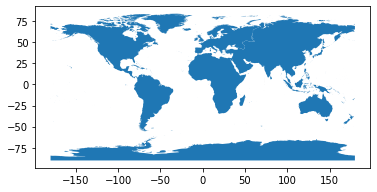

In [50]:
#map graph
map_df.plot()

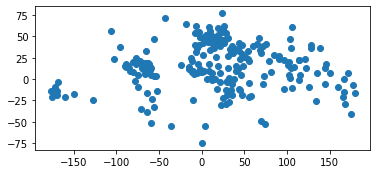

In [51]:
geo.plot()

Text(0.5, 1.0, 'Countries Location')

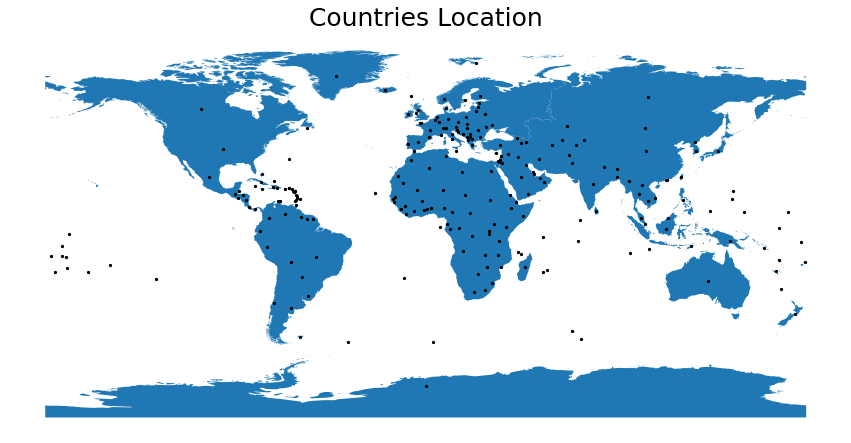

In [55]:
#plot coordinates on top of map graph

#this is to set the size of the borders
fig, ax = plt.subplots(1, figsize=(15,10))

#this is the map
basemap = map_df.plot(ax=ax)

#plot coordinates on top of map graph
geo.plot(ax=basemap, color='black', marker=".", markersize=20)

#take off axis numbers
ax.axis('off')

#put title on map
ax.set_title("Countries Location", fontsize=25, fontweight=3)